# Project: 고양이 수염 스티커 만들기
face detection과 face landmark estimation을 사용한다. <br>
본인 셀카가 마땅한 게 없어서 대부분을 연예인 사진으로 대체하였습니다...^-^

In [2]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

## 이미지 불러오기

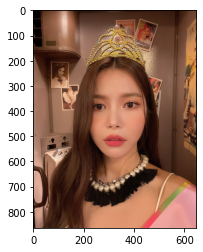

In [2]:
img_path = "./images/front.JPEG"
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()
plt.imshow(img_rgb)
plt.show()

## 얼굴 검출 & 랜드마크 검출하기

In [3]:
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(200, 290) (468, 558)]]


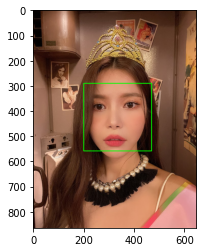

In [4]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA) # 초록색, 두께 2

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [5]:
model_path = './models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

In [6]:
list_landmarks =[]

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


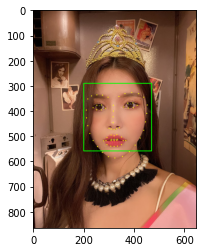

In [7]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # 크기 2 하늘색, 내부 채워진 원

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용 위치 확인하기

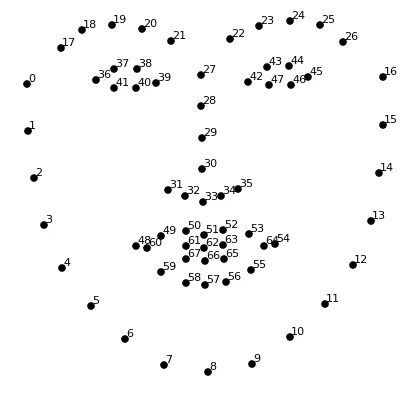 <br>
콧볼 정중앙에 위치하도록 하자

In [8]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33]) # 코 좌표 확인
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(320, 473)
(x,y) : (320,473)
(w,h) : (269,269)


In [9]:
sticker_path = './images/cat_whiskers.png' # 고양이 수염 위치
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape)

(269, 269, 3)


In [10]:
refined_x = x - w // 2
refined_y = y - h // 2
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (186,339)


## 스티커 적용하기

In [11]:
# 고양이 수염 불러오기
sticker_path = "./images/cat_whiskers.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(269, 269, 3)


In [12]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

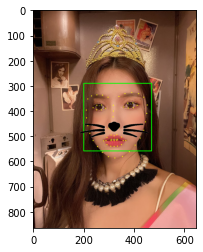

In [13]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

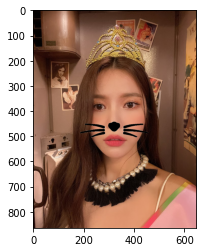

In [14]:
# 바운딩 박스, landmark 제거
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

코 정중앙에 잘 위치한 것을 확인할 수 있다.

## 문제점 찾아보기
다양한 각도, 구도의 사진으로 실험해보자

In [24]:
# 전체 파이프라인 함수로 만들기
def put_sticker(img_path):
    img_path = img_path
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    sticker_path = './images/cat_whiskers.png' # 고양이 수염 위치
    img_sticker = cv2.imread(sticker_path)
        
    detector_hog = dlib.get_frontal_face_detector()

    dlib_rects = detector_hog(img_rgb, 1)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        
    model_path = './models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks =[]

    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
        
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[33][0]
        y = landmark[33][1]
        w = h = dlib_rect.width()
        
        img_sticker = cv2.resize(img_sticker, (w,h)) 

        refined_x = x - w // 2
        refined_y = y - h // 2
        if refined_x < 0: 
            img_sticker = img_sticker[:, -refined_x:]
            refined_x = 0

        if refined_y < 0:
            img_sticker = img_sticker[-refined_y:, :]
            refined_y = 0

        sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
        img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
            np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

### 1. 거리가 먼 사진

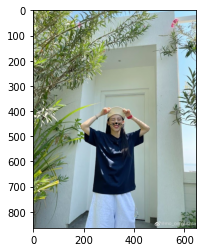

In [25]:
put_sticker("./images/far.JPG")

### 2. 다른 각도의 사진

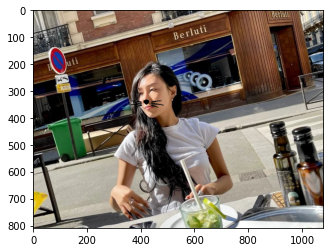

In [16]:
put_sticker("./images/side.JPG")

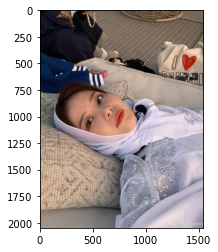

In [18]:
put_sticker("./images/lean.JPG")

In [20]:
img_path = "./images/lean.JPG"
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
dlib_rects

rectangles[]

고개가 살짝 돌아간 것은 스티커가 잘 붙었지만, 누워있는 사진은 얼굴 검출에 실패하였다.

### 3. 여러 명 있는 사진

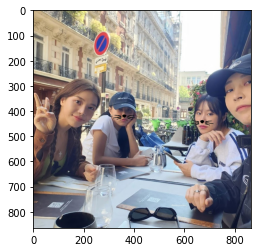

In [12]:
put_sticker("./images/multi.JPG")

뒤에 두 명은 잘 검출이 되었지만, 앞에 두명은 얼굴 검출에 실패하였다.

### 4. 마스크 낀 사진

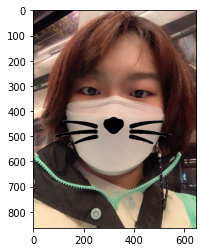

In [17]:
put_sticker("./images/mask.JPG")

마스크를 껴도 랜드마크가 잘 검출되었다.

### 5. 빛에 날린 사진

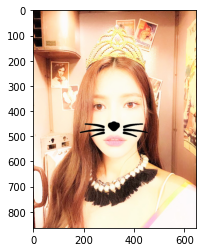

In [27]:
put_sticker("./images/front_light.JPEG")

빛을 좀 날렸는데도 스티커가 잘 붙었다.

## 회고

- 너무 누워 있는 사진이 아니면 스티커가 잘 붙은 것을 확인할 수 있다.
- 심지어 마스크 낀 사진은 검출이 안될 줄 알았는데 이것도 잘 검출이 되었다.
- 4명이 있는 사진도 2명은 검출이 잘 되었지만, 그림자지거나 잘려서 얼굴이 온전하게 나오지 않은 두 명은 검출이 잘 되지 않았다.
- 수염이 얼굴 각도에 맞게 조금 더 돌아가면 좋을 것 같다.
- 딥러닝 모델이 아닌 머신러닝 기반 모델인데도 정확도가 괜찮은 점이 인상깊었다.